# 1. Install Dependencies and Setup

In [59]:
!pip install tensorflow tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [60]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.3.1
anyio                     4.9.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
astroid                   2.13.5
asttokens                 3.0.0
astunparse                1.6.3
async-lru                 2.0.5
attrs                     25.3.0
autopep8                  2.3.2
babel                     2.17.0
beautifulsoup4            4.13.4
black                     22.3.0
bleach                    6.2.0
certifi                   2025.7.9
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.1.3
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.2
coverage                  7.10.5
cycler                    0.12.1
debugpy                   1.8.14
decorator                 5.2.1
defusedxml                0.7.1
dill                      0.4.0
executing      

In [61]:
import tensorflow as tf
import os

In [62]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [63]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [64]:
!apt-get update && apt-get install -y libgl1-mesa-glx

Reading package lists... Done
E: List directory /var/lib/apt/lists/partial is missing. - Acquire (13: Permission denied)


In [65]:
data_dir = 'data' 

In [66]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [67]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data/sad/280-2804580_sad-people-png-sad-person-png-transparent-png.png
Issue with image data/sad/iStock_000001932580XSmall.jpg
Issue with image data/sad/b11b520b0818895ae5563d1e70294052.jpg
Issue with image data/sad/image25.jpeg
Issue with image data/sad/screen-shot-2014-07-31-at-6-09-12-pm.png
Issue with image data/sad/maxresdefault3.jpg
Issue with image data/sad/image11.jpeg
Issue with image data/sad/image14.jpeg
Issue with image data/sad/766x415_Depression_vs_Sadness.jpg
Issue with image data/sad/sad-human-figure-depression-concept-drawing-frank-ramspott.jpg
Issue with image data/sad/image32.png
Issue with image data/sad/images40.jpg
Issue with image data/sad/images14.jpg
Issue with image data/sad/images47.jpg
Issue with image data/sad/images10.jpg
Issue with image data/sad/images24.jpg
Issue with image data/sad/images23.jpg
Issue with image data/sad/0x0.jpg
Issue with image data/sad/image17.jpeg
Issue with image data/sad/sad-more-money.jpg
Issue with image data/sad

Issue with image data/sad/504212.jpg
Issue with image data/sad/images35.jpg
Issue with image data/sad/images5.jpg
Issue with image data/sad/image13.jpeg
Issue with image data/sad/images11.jpg
Issue with image data/sad/image19.jpeg
Issue with image data/sad/sadness.jpg
Issue with image data/sad/images3.jpg
Issue with image data/sad/images37.jpg
Issue with image data/sad/sadness-inside-out-today-main-tease-191018.jpg
Issue with image data/sad/dark-depression-mood-people-wallpaper-preview.jpg
Issue with image data/sad/image5.jpeg
Issue with image data/sad/maxresdefault.jpg
Issue with image data/sad/images36.jpg
Issue with image data/sad/52672678._SX318_SY475_.jpg
Issue with image data/sad/images17.jpg
Issue with image data/sad/images31.jpg
Issue with image data/sad/images38.jpg
Issue with image data/sad/images4.jpg
Issue with image data/sad/image30.png
Issue with image data/sad/image29.jpeg
Issue with image data/sad/images18.jpg
Issue with image data/sad/ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4

# 3. Load Data

In [68]:
import numpy as np
from matplotlib import pyplot as plt

In [69]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [70]:
data_iterator = data.as_numpy_iterator()

In [71]:
batch = data_iterator.next()

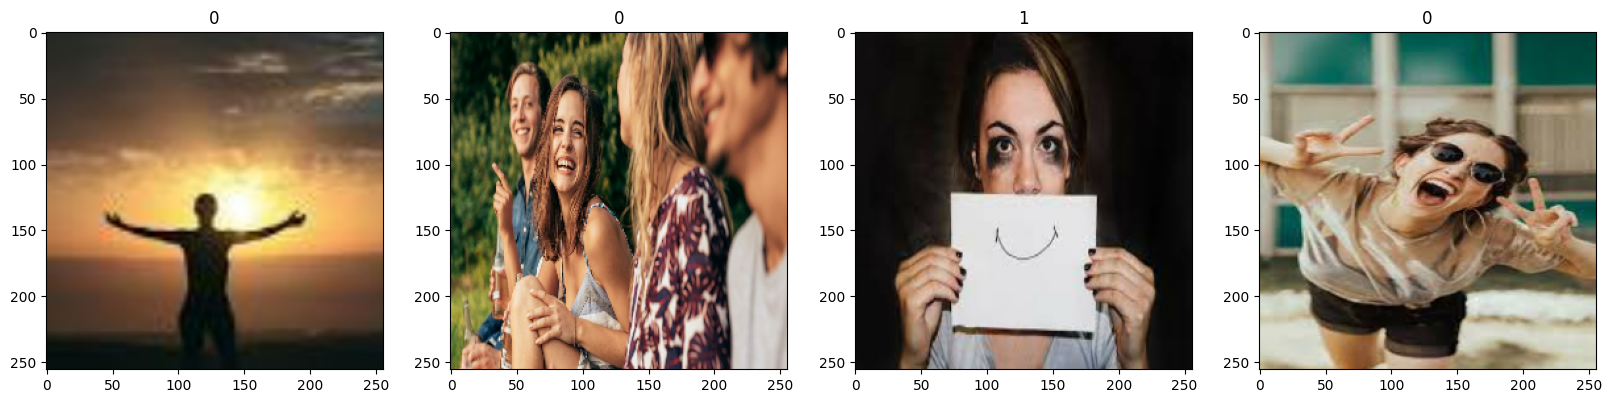

In [72]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [73]:
data = data.map(lambda x,y: (x/255, y))

In [74]:
data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         ...,
 
         [[0.05490196, 0.4627451 , 0.6784314 ],
          [0.05490

# 5. Split Data

In [75]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [76]:
train_size

7

In [77]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [78]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [80]:
model = Sequential()

In [81]:
# Füge die erste Convolution-Schicht hinzu:
# Conv2D mit 16 Filtern, Kernelgröße 3x3, Schrittweite 1, ReLU-Aktivierung.
# Die input_shape gibt die erwartete Eingabegröße an (256x256 Pixel, 3 Farbkanäle).
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))

# Füge eine MaxPooling-Schicht hinzu:
# Diese reduziert die räumliche Größe der Feature-Maps und hilft, Überanpassung zu vermeiden.
model.add(MaxPooling2D())

# Zweite Convolution-Schicht:
# Mehr Filter (32), um komplexere Merkmale zu extrahieren.
model.add(Conv2D(32, (3,3), 1, activation='relu'))

# MaxPooling reduziert erneut die Größe der Feature-Maps.
model.add(MaxPooling2D())

# Dritte Convolution-Schicht:
# Wieder 16 Filter, um weitere Merkmale zu erfassen.
model.add(Conv2D(16, (3,3), 1, activation='relu'))

# Nochmals MaxPooling.
model.add(MaxPooling2D())

# Flatten-Schicht:
# Wandelt die mehrdimensionalen Feature-Maps in einen eindimensionalen Vektor um,
# damit sie von Dense-Schichten verarbeitet werden können.
model.add(Flatten())

# Dense-Schicht mit 256 Neuronen und ReLU-Aktivierung:
# Lernt komplexe Zusammenhänge aus den extrahierten Merkmalen.
model.add(Dense(256, activation='relu'))

# Ausgabeschicht:
# Dense mit 1 Neuron und Sigmoid-Aktivierung für binäre Klassifikation (z.B. Happy/Sad).
model.add(Dense(1, activation='sigmoid'))

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [82]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [84]:
logdir='logs'

In [85]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [86]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5580 - loss: 1.2595 - val_accuracy: 0.6562 - val_loss: 0.6674
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 778ms/step - accuracy: 0.6134 - loss: 0.6817

2025-08-25 18:16:05.851760: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6339 - loss: 0.6826 - val_accuracy: 0.7031 - val_loss: 0.6706
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 878ms/step - accuracy: 0.6095 - loss: 0.6671

2025-08-25 18:16:14.796781: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6161 - loss: 0.6458 - val_accuracy: 0.5156 - val_loss: 0.6778
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.5733 - loss: 0.6315

2025-08-25 18:16:22.125482: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 977ms/step - accuracy: 0.6071 - loss: 0.6364 - val_accuracy: 0.5625 - val_loss: 0.6471
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 700ms/step - accuracy: 0.6277 - loss: 0.6327

2025-08-25 18:16:33.014208: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6786 - loss: 0.6181 - val_accuracy: 0.8125 - val_loss: 0.5811
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.8626 - loss: 0.5575

2025-08-25 18:16:41.262138: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 948ms/step - accuracy: 0.8348 - loss: 0.5416 - val_accuracy: 0.7812 - val_loss: 0.4946
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.7222 - loss: 0.5164

2025-08-25 18:16:51.662614: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 922ms/step - accuracy: 0.7500 - loss: 0.5008 - val_accuracy: 0.7344 - val_loss: 0.5211
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.8131 - loss: 0.4622

2025-08-25 18:16:57.927085: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 990ms/step - accuracy: 0.8080 - loss: 0.4558 - val_accuracy: 0.8281 - val_loss: 0.3898
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.8082 - loss: 0.4134

2025-08-25 18:17:06.275668: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8348 - loss: 0.3822 - val_accuracy: 0.8281 - val_loss: 0.3888
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.8277 - loss: 0.3923

2025-08-25 18:17:14.683638: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8482 - loss: 0.3669 - val_accuracy: 0.8906 - val_loss: 0.3165
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.8590 - loss: 0.3556

2025-08-25 18:17:20.869099: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 886ms/step - accuracy: 0.8884 - loss: 0.3318 - val_accuracy: 0.9688 - val_loss: 0.2695
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - accuracy: 0.8840 - loss: 0.3010

2025-08-25 18:17:31.266357: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 979ms/step - accuracy: 0.8795 - loss: 0.2842 - val_accuracy: 0.9531 - val_loss: 0.2293
Epoch 13/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.9661 - loss: 0.2211

2025-08-25 18:17:38.463576: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 986ms/step - accuracy: 0.9554 - loss: 0.2083 - val_accuracy: 0.9844 - val_loss: 0.1332
Epoch 14/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.9645 - loss: 0.1525

2025-08-25 18:17:46.021491: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9643 - loss: 0.1521 - val_accuracy: 0.9844 - val_loss: 0.1120
Epoch 15/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - accuracy: 0.9697 - loss: 0.1372

2025-08-25 18:17:52.757115: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 926ms/step - accuracy: 0.9688 - loss: 0.1330 - val_accuracy: 0.9688 - val_loss: 0.1163
Epoch 16/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 598ms/step - accuracy: 0.9295 - loss: 0.1688

2025-08-25 18:17:58.913285: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 896ms/step - accuracy: 0.9152 - loss: 0.1864 - val_accuracy: 0.8438 - val_loss: 0.3001
Epoch 17/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 975ms/step - accuracy: 0.9464 - loss: 0.1771 - val_accuracy: 0.9844 - val_loss: 0.0939
Epoch 18/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 898ms/step - accuracy: 0.9777 - loss: 0.1162 - val_accuracy: 0.9688 - val_loss: 0.1222
Epoch 19/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 975ms/step - accuracy: 0.9732 - loss: 0.1156 - val_accuracy: 1.0000 - val_loss: 0.0610
Epoch 20/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 865ms/step - accuracy: 0.9821 - loss: 0.0814 - val_accuracy: 0.9531 - val_loss: 0.0882
Epoch 21/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9821 - loss: 0.0566 - val_accuracy: 0.9844 - val_loss: 0.0553
Epoch 22/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 993ms/step - accuracy: 1.0000 - loss: 0.0280 - val_accuracy: 1.0000 - val_loss: 0.0220
Epoch 23/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9866 - loss: 0.0397 - val_accuracy: 1.0000 - val_loss: 0.023

2025-08-25 18:20:01.823619: W tensorflow/core/kernels/data/prefetch_autotuner.cc:55] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9911 - loss: 0.0190 - val_accuracy: 1.0000 - val_loss: 0.0058


# 8. Plot Performance

In [87]:
import pandas as pd
import plotly.express as px

# Erstelle ein DataFrame mit den Trainings- und Validierungsverlusten sowie den Epochenzahlen
loss_df = pd.DataFrame({
    'loss': hist.history['loss'],         # Trainingsverlust pro Epoche
    'val_loss': hist.history['val_loss'], # Validierungsverlust pro Epoche
    'epoch': range(1, len(hist.history['loss']) + 1) # Epochennummern (startend bei 1)
})

# Erzeuge ein Liniendiagramm mit Plotly Express
# Die x-Achse zeigt die Epoche, die y-Achse zeigt die Werte für Trainings- und Validierungsverlust
# Das Diagramm erhält Achsenbeschriftungen und einen Titel
fig = px.line(
    loss_df, 
    x='epoch', 
    y=['loss', 'val_loss'], 
    labels={'value': 'Loss', 'epoch': 'Epoch'}, 
    title='Loss'
)

# Zeige das Diagramm im Notebook an
fig.show()

In [88]:
import pandas as pd

import plotly.express as px

# Erstelle ein DataFrame mit den Trainings- und Validierungsgenauigkeiten sowie den Epochenzahlen
acc_df = pd.DataFrame({
    'accuracy': hist.history['accuracy'],         # Trainingsgenauigkeit pro Epoche
    'val_accuracy': hist.history['val_accuracy'], # Validierungsgenauigkeit pro Epoche
    'epoch': range(1, len(hist.history['accuracy']) + 1) # Epochennummern (startend bei 1)
})

# Erzeuge ein Liniendiagramm mit Plotly Express
# Die x-Achse zeigt die Epoche, die y-Achse zeigt die Werte für Trainings- und Validierungsgenauigkeit
# Das Diagramm erhält Achsenbeschriftungen und einen Titel
fig = px.line(
    acc_df, 
    x='epoch', 
    y=['accuracy', 'val_accuracy'], 
    labels={'value': 'Accuracy', 'epoch': 'Epoch'}, 
    title='Model Accuracy'
)

# Zeige das Diagramm im Notebook an
fig.show()

# 9. Evaluate

In [89]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [90]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [91]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


2025-08-25 18:20:05.765869: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [92]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [93]:
import cv2

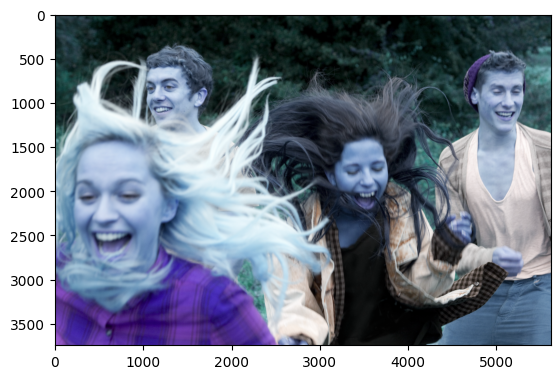

In [103]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

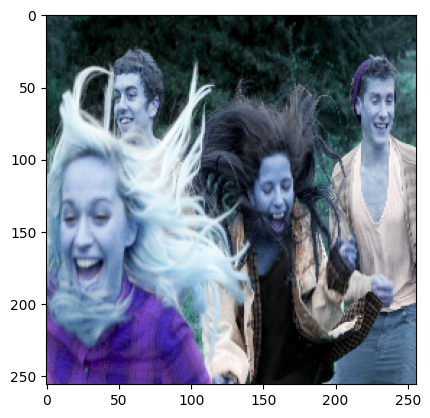

In [104]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [105]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [106]:
yhat

array([[0.07954638]], dtype=float32)

In [107]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [99]:
from tensorflow.keras.models import load_model

In [100]:
model.save(os.path.join('models','imageclassifier.h5'))

In [101]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [102]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[0.99022806]], dtype=float32)